In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=2)
sns.set_style("whitegrid")
np.seterr(divide='ignore');

# Combining Newton's method with Bisection

Newton's method features a quadratic convergence rate, but is not guaranteed to converge unless the algorithm is started sufficiently close to the root of a function $f$.  For example, the function

$$ f(x) = \tanh(20x)$$

where `tanh` is the hyperbolic tangent function, has a single root at $x = 0$. Newton's method will quickly diverge even with initial guesses at modest distances from the root.

Write the function `f(x)` that returns the function value $f(x)$ defined above.

Write the function `df(x)` that returns the function derivative $f'(x)$. Recall that:

$$\frac{d}{dz}\tanh(z) = 1 - \tanh^2(z)$$



In [7]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def f(x):
    return np.tanh(20*x)
def df(x):
    return 1.-f(x)**2

In [45]:
df(0.09)

0.10355837403815205

Plot the function and its derivative over the interval $[-2,2]$.  Use two different plots for the function and its derivative

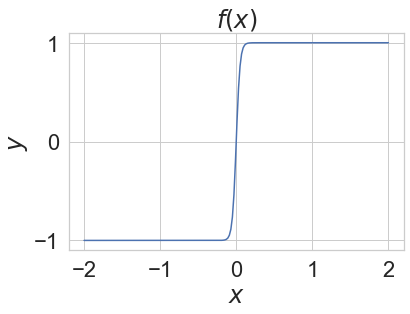

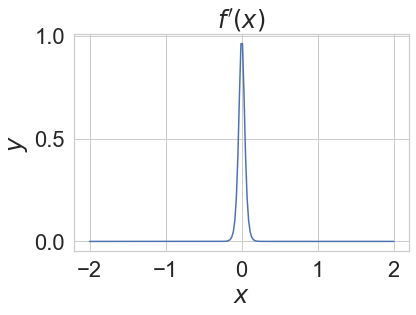

In [8]:
a0 = -2
b0 = 2

xmesh = np.linspace(a0, b0,200)
plt.plot(xmesh, f(xmesh))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$f(x)$')
plt.show()
plt.plot(xmesh,df(xmesh))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$f\'(x)$')
plt.show()

You should notice that $f'(x) \approx 0$ for most values of the input $x$.  Newton's method, which is given by:

$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$$

will divide by a very small number unless $x_k \approx 0$.

Even with a starting guess of $x_0 = 0.06$, Newton's method will diverge.

In [9]:
guesses = [0.06]

###### Evaluate the next cell many times in-place (using Ctrl-Enter)
The green dot is the current guess, and the orange line is the corresponding tangent line.  The next iterate will be where the tangent line intersects $x$-axis.

Next iterate will be:  -2.6731146068380465


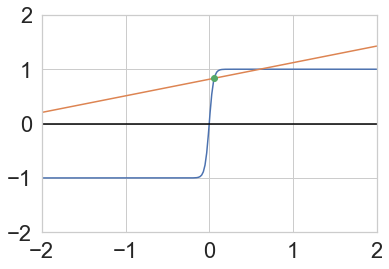

In [10]:
x = guesses[-1] # grab last guess
slope = df(x)

# plot approximate function
plt.plot(xmesh, f(xmesh))
plt.plot(xmesh, f(x) + slope*(xmesh-x))
plt.plot(x, f(x), "o")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.axhline(0, color="black")

# Compute approximate root
xnew = x - f(x) / slope
guesses.append(xnew)

print('Next iterate will be: ', xnew)


On the other hand, the bisection method will always find the root of this function, as long as the initial interval endpoints are of opposite sign.  It will not converge as fast as Newton's method, however.  To get the best of both worlds, we can combine the two as follows.

### In this notebook, you will write a function that combines the two ideas:

```python
def bisection_Newton(a,b,tol,maxiter):
    
    # write your code here following the steps below
    
    return xstar, steps

```

Your function takes as arguments the initial interval `a` and `b`, the tolerance for the stopping criteria `tol` and the maximum number of iterations `maxiter`. When successful, the function returns the float variable `xstar` with the root obtained by the method, and the tuple `steps` that we will describe soon.

Before implementing the function, we will guide you through the **steps needed to write this hybrid algorithm**.

**Step 1)** Check if the initial interval $[a,b]$ is a valid interval. Recall that for the bisection method, we require $f(a)\cdot f(b) < 0$ (so that the function values have opposite signs).  

If $f(a)\cdot f(b) > 0$ the algorithm should stop, and the function should return the string `Root is not bracketed by interval. Stop.`.

Start writing the function `bisection_Newton(a,b,tol,maxiter)` in the `#grade` cell below with only this step 1) -- you will receive partial credit for that.


In [11]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def bisection_Newton(a,b,tol,maxiter):
    if f(a)*f(b)>0:
        return 'Root is not bracketed by interval. Stop.'

**Step 2)** The algorithm will try to first run a Newton iteration:

$$ x_{new} = x_{old} + s $$

where $s = -f(x_{old})/f'(x_{old})$ is the Newton step.

For $x_{old}$, the hybrid algorithm will use one of the interval boundaries, either $a$ or $b$. We will use the function values to make that decision. 

We have two options:

- set $x_{old} = \text{argmin}_{x=a,b} |f(x)|$

or

- set $x_{old} = \text{argmax}_{x=a,b} |f(x)|$

Discuss with your team which one you should choose. Remember that you are trying to find $f(x_{new}) = 0$.

Write the function `current_newton_step` that takes as arguments `(a,b,fa,fb)` where `fa = f(a)` and `fb = f(b)`, and returns `(xold, f(xold))`.

In [46]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def current_newton_step(a,b,fa,fb):
    if abs(fa)>abs(fb):
        xold=a
    else:
        xold=b
    return (xold, f(xold))

In this hybrid method, the first attempt is to use Newton Method as the update rule, since it has faster convergence when close to the solution. However, if the Newton iteration takes us outside the interval $(a,b)$, then we are not getting any closer to the desired root, and may even be diverging.  In this case, we fall back to the bisection method. In summary, we first try:

$x_{new} = x_{old} - \frac{f(x_{old})}{f'(x_{old})}$

and if $x_{new} \geq b$ or $x_{new} \leq a$, we scrap this value of $x_{new}$ and use the bisection method instead:

$ x_{new} = \frac{a + b}{2}$.


Using the same criteria as the standard bisection method, we then update either $a$ or $b$ to have the value $x_{new}$.  We then repeat the process and choose the next value of $x_{old}$ as defined above.  We can terminate whenever $|f(x_{old})| < \text{tol}$.

**We will help you implemeting this algorithm into the function `bisection_Newton`.** I suggest you copy/paste your previous function definition in the new `#grade` cell below. We will provide several steps, so you can slowly construct the entire function. 

In [48]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def bisection_Newton(a,b,tol,maxiter):
    if f(a)*f(b)>0:
        return 'Root is not bracketed by interval. Stop.'
    else:
        steps=[]
        for i in range(maxiter):
            fa=f(a)
            fb=f(b)
            xold,fo=current_newton_step(a,b,fa,fb)
            xnew=xold-fo/df(xold)
            method = 'Newton'
            if xnew<=a or xnew>=b:
                method = 'Bisection'
                xnew=(a+b)/2
            if f(xnew)*f(a)<0:
                b=xnew
            else:
                a=xnew
            steps.append((abs(f(xnew)), method))
            if abs(f(xnew))<tol:
                return xnew, steps

In [41]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def bisection_Newton(a,b,tol,maxiter):
    if f(a)*f(b)>0:
        return 'Root is not bracketed by interval. Stop.'
    else:
        steps=[]
        fa=f(a)
        fb=f(b)
        xnew=current_newton_step(a,b,fa,fb)[0]
        for i in range(maxiter):
            fa=f(a)
            fb=f(b)
            xold=xnew
            xnew=xold-f(xold)/df(xold)
            method = 'Newton'
            if xnew<=a or xnew>=b:
                method = 'Bisection'
                xnew=(a+b)/2.
            steps.append((abs(f(xnew)), method))
            if f(xnew)*f(a)<0:
                b=xnew
            else:
                a=xnew
            if abs(f(xnew))<tol:
                return xnew, steps

PrairieLearn will only have tests for the complete function. It will not make sense to click "Save & Grade" until you complete the implementation of the function (just make sure you click at least once to register your attendance).


Add the steps below to the above function:

**Step 3)**: We will start the iterative process. To make sure we don't get into an infinite loop, or iterate too many times, we will use a `for loop`, iterating for at most `maxiter`.  Later we will define a stopping criteria to break out of the for loop.

The next steps will build the for loop block:


**Step 4)**: Find the current point for the Newton Method using the function `current_newton_step(a,b,fa,fb)`. 

**Step 5)**: Compute `xnew` using the Newton update.

**Step 6)**: Set the variable `method = Newton` (since you are attempting to use the Newton Method first).

**Step 7)**: You should now check if Newton Method was a "good option". If the update `xnew` is outside of the interval `(a,b)`, then Newton Method "failed". In that case, you need to re-compute `xnew` using the Bisection method. Set the variable `method = Bisection`, indicating the current iteration is actually using the Bisection method. If the update `xnew` is inside the interval, then we continue with this update.

**Step 8)**: Once you have the value of `xnew`, which is guaranteed to be inside the interval `[a,b]`, you need to update the interval for the next iteration.

  - use the bisection algorithm, which looks at the sign of the functions, to decide if the next interval should be `[a,xnew]` or `[xnew,b]` . In essence, in this step, you need to update the values of `a` and `b`, and their respective function values `fa` and `fb`.
  
**Step 9)**: Update the list `steps` (that you should define as an empty list before the for loop block) to append the tuple `(abs(f(xnew)), method)`, so that you can have a history of the iterative process.

**Step 10)**: Implement a stopping criteria, terminating the iterations whenever $|f(x_{old})| < \text{tol}$. 


**Step 10)**: To finalize, your function should return `xnew` and `steps`

At this point, if you call your function `c, steps = bisection_Newton(-2,5,1e-8,100)` you would get the following result for the variable `steps`:


```
[(1.0, 'Bisection'),
 (0.9999092042625951, 'Bisection'),
 (0.9999999999722241, 'Bisection'),
 (0.9988944427261528, 'Bisection'),
 (0.5545997223493823, 'Bisection'),
 (0.17416574680846925, 'Newton'),
 (0.003654552196927575, 'Newton'),
 (3.2540049472768056e-08, 'Newton'),
 (2.0679515313825692e-23, 'Newton')]
```

In [49]:
xnew, steps= bisection_Newton(-2,5,1e-8,100)
print(xnew)
steps

-2.3283064365386963e-10


[(1.0, 'Bisection'),
 (0.9999092042625951, 'Bisection'),
 (0.9999999999722241, 'Bisection'),
 (0.9988944427261528, 'Bisection'),
 (0.5545997223493823, 'Bisection'),
 (0.9158245441687624, 'Bisection'),
 (0.43718878514171233, 'Bisection'),
 (0.07796644137536819, 'Bisection'),
 (0.1928662925292509, 'Bisection'),
 (0.05852678673317719, 'Bisection'),
 (0.009765314570983716, 'Bisection'),
 (0.024409213017793918, 'Bisection'),
 (0.007324087785573136, 'Bisection'),
 (0.0012207025186705602, 'Bisection'),
 (0.0030517483386321496, 'Bisection'),
 (0.0009155270879547009, 'Bisection'),
 (0.00015258788944076213, 'Bisection'),
 (0.000381469708058784, 'Bisection'),
 (0.00011444091746914964, 'Bisection'),
 (1.9073486325812034e-05, 'Bisection'),
 (4.768371578417243e-05, 'Bisection'),
 (1.4305114745117968e-05, 'Bisection'),
 (2.3841857910111073e-06, 'Bisection'),
 (5.960464477468477e-06, 'Bisection'),
 (1.788139343259813e-06, 'Bisection'),
 (2.980232238769443e-07, 'Bisection'),
 (7.45058059692245e-07, 'Bi